In [ ]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

# load dataset
dataset= load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# clean dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_us_analysts = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_us_analysts = df_us_analysts.dropna(subset=['salary_year_avg'])

In [3]:
df_us_analysts = df_us_analysts.explode('job_skills')

In [4]:
df_group_us = df_us_analysts.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [5]:
df_top_paying = df_us_analysts.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False).head(10)
df_top_paying

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [6]:
df_popular_skills = df_us_analysts.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).sort_values(by='median', ascending=False)
df_popular_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


C:\Users\DORCAS\AppData\Local\Temp\ipykernel_7192\2049457561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_paying, x='median', y=df_top_paying.index,
C:\Users\DORCAS\AppData\Local\Temp\ipykernel_7192\2049457561.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_popular_skills_sorted, x='count', y=df_popular_skills_sorted.index,


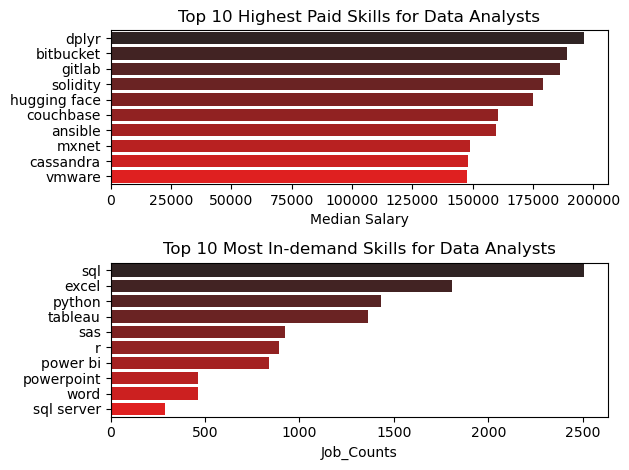

In [14]:
fig, ax = plt.subplots(2, 1)

# Highest paid
sns.barplot(data=df_top_paying, x='median', y=df_top_paying.index,
            ax=ax[0], palette='dark:r')
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('Median Salary')

# Most in-demand
df_popular_skills_sorted = df_popular_skills.sort_values(by='count', ascending= False)
sns.barplot(data=df_popular_skills_sorted, x='count', y=df_popular_skills_sorted.index,
            ax=ax[1], palette='dark:r')
ax[1].set_title('Top 10 Most In-demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Job_Counts')

fig.tight_layout()
